# Visualizations of Dataset

For our upcoming paper on the oropharyngeal SCC dataset we want to include graphics and figures that allow the reader to quickly understand the underlying data and motivate some "hypothesis-generation".

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import font_manager
from pathlib import Path
from typing import Union, Tuple

In [2]:
usz_blue = '#005ea8'
usz_green = '#00afa5'
usz_red = '#ae0060'
usz_orange = '#f17900'
usz_gray = '#c5d5db'

In [3]:
font_dirs = ["/usr/share/fonts/truetype/dejavu", "/mnt/c/Windows/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [6]:
def set_size(
    width: Union[str, float] = "single", 
    unit: str = "cm", 
    ratio: Union[str, float] = "golden"
) -> Tuple[float]:
    """Set the figure size such that it looks good on an A4 paper.
    
    Args:
        width: Choose between 'single' (default: 10 cm), 'full' (default: 
            16 cm) or a number.
        unit: Can be 'cm' or nothing, in which case inches are used (this is 
            strongly discouraged).
        ratio: Ratio of with to hieght. By default this is set to the golden 
            ration, which is supposed to look quite nice.
    
    Returns:
        A tuple with `(width, height)` in inches that can be used as an 
        argument for `figsize`.
    """
    if width == "single":
        width = 10
    elif width == "full":
        width = 16
    else:
        try:
            width = width
        except:
            width = 10
            
    if unit == "cm":
        width = width / 2.54
        
    if ratio == "golden":
        ratio = 1.618
    else:
        ratio = ratio
    
    try:
        height = width / ratio
    except:
        height = width / 1.618
        
    return (width, height)

plt.style.use("./figures/.mplstyle")

In [7]:
SAVE_PLOTS = True
PLOT_PATH = Path("./figures").resolve()

## Loading the Data

In [36]:
filepath = "./data.csv"
usz_data = pd.read_csv(filepath, header=[0,1,2])
usz_data

patient                                                                    \
          #                                                                     
         id  gender age diagnose_date alcohol_abuse nicotine_abuse hpv_status   
0         1    male  59    27/10/2017          True           True       True   
1         2  female  75    29/12/2017         False          False       True   
2         3    male  87    20/06/2018         False           True       True   
3         4    male  87    04/07/2018          True           True      False   
4         5  female  70    17/07/2018          True           True       True   
..      ...     ...  ..           ...           ...            ...        ...   
282     283    male  49    11/10/2013         False           True      False   
283     284    male  67    06/12/2013          True           True       True   
284     285    male  44    16/08/2013          True           True      False   
285     286    male  67    07/10/2013          True           True      False   
286     287    male  76    10/09/2013         False           True       True   

                                         ... path                             \
                                         ... left                              
    neck_dissection tnm_edition n_stage  ...  IIa IIb  III   IV    V  VI VII   
0             False           8       1  ...  NaN NaN  NaN  NaN  NaN NaN NaN   
1             False           8       1  ...  NaN NaN  NaN  NaN  NaN NaN NaN   
2             False           7       2  ...  NaN NaN  NaN  NaN  NaN NaN NaN   
3             False           8       3  ...  NaN NaN  NaN  NaN  NaN NaN NaN   
4             False           7       2  ...  NaN NaN  NaN  NaN  NaN NaN NaN   
..              ...         ...     ...  ...  ...  ..  ...  ...  ...  ..  ..   
282           False           7       1  ...  NaN NaN  NaN  NaN  NaN NaN NaN   
283           False           7       2  ...  NaN NaN  NaN  NaN  NaN NaN NaN   
284           False           7       2  ...  NaN NaN  NaN  NaN  NaN NaN NaN   
285           False           7       2  ...  NaN NaN  NaN  NaN  NaN NaN NaN   
286           False           7       2  ...  NaN NaN  NaN  NaN  NaN NaN NaN   

                  
                  
    VIII  IX   X  
0    NaN NaN NaN  
1    NaN NaN NaN  
2    NaN NaN NaN  
3    NaN NaN NaN  
4    NaN NaN NaN  
..   ...  ..  ..  
282  NaN NaN NaN  
283  NaN NaN NaN  
284  NaN NaN NaN  
285  NaN NaN NaN  
286  NaN NaN NaN  

[287 rows x 192 columns]

## Age & Gender

Simplest thing one can do is plot the basic demographics. We didn't put this in the paper, since it isn't really relevant.

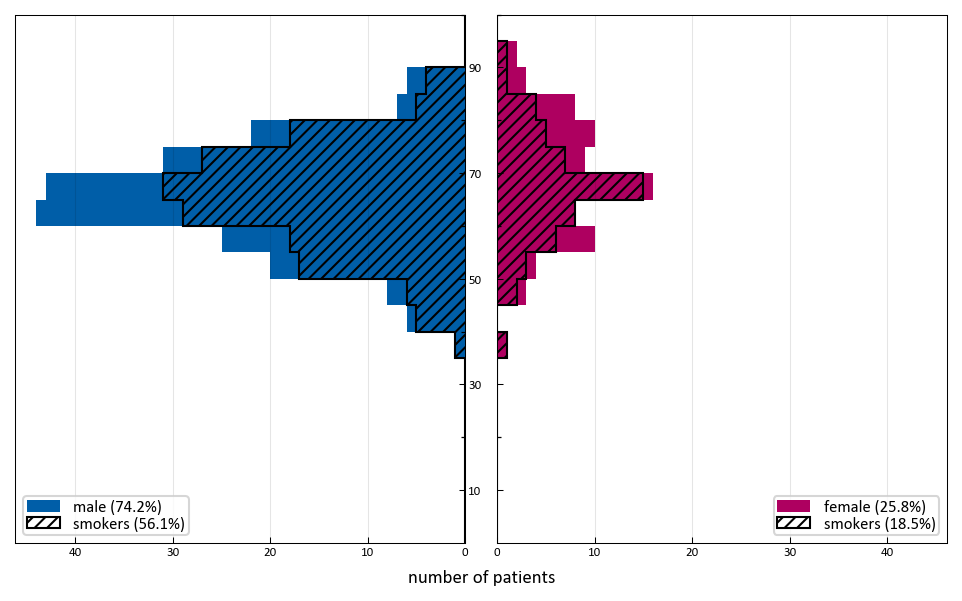

In [9]:
male_ages = usz_data.loc[
    usz_data[("patient", "#", "gender")] == "male", 
    ("patient", "#", "age")
].values
male_smoker_ages = usz_data.loc[
    (usz_data[("patient", "#", "gender")] == "male") 
    & usz_data[("patient", "#", "nicotine_abuse")],
    ("patient", "#", "age")
]
male_percent = 100 * len(male_ages) / len(usz_data)
male_smoker_percent = 100 * len(male_smoker_ages) / len(usz_data)

female_ages = usz_data.loc[
    usz_data[("patient", "#", "gender")] == "female", 
    ("patient", "#", "age")
].values
female_smoker_ages = usz_data.loc[
    (usz_data[("patient", "#", "gender")] == "female") 
    & usz_data[("patient", "#", "nicotine_abuse")],
    ("patient", "#", "age")
]
female_percent = 100 * len(female_ages) / len(usz_data)
female_smoker_percent = 100 * len(female_smoker_ages) / len(usz_data)

bins = np.linspace(0, 100, 21)
hist_kwargs = {
    "bins": bins,
    "orientation": "horizontal"
}

fig, ax = plt.subplots(
    1,2, 
    figsize=set_size(width="full"), 
    sharey=True, 
    gridspec_kw={"wspace": 0.01}, 
    constrained_layout=True
);

ax[0].hist(
    male_ages, 
    label=f"male ({male_percent:.1f}%)", 
    color=usz_blue, histtype="stepfilled", **hist_kwargs
);
ax[0].hist(
    male_smoker_ages, 
    label=f"smokers ({male_smoker_percent:.1f}%)", 
    color="black", histtype="step", hatch="////", **hist_kwargs
);

male_xlim = ax[0].get_xlim();
ax[0].set_xlim(male_xlim[::-1]);
ax[0].set_ylim([0, 100]);
ax[0].yaxis.tick_right();
ax[0].set_yticks(np.linspace(10,90,5));
ax[0].set_yticks(np.linspace(20,100,5), minor=True);
ax[0].set_yticklabels(np.linspace(10,90,5, dtype=int));
ax[0].grid(axis="x");
ax[0].legend(loc="lower left", fontsize=8);


ax[1].hist(
    female_ages, 
    label=f"female ({female_percent:.1f}%)", 
    color=usz_red, histtype="stepfilled", **hist_kwargs
);
ax[1].hist(
    female_smoker_ages, 
    label=f"smokers ({female_smoker_percent:.1f}%)", 
    color="black", histtype="step", hatch="////", **hist_kwargs
);

ax[1].set_xlim(male_xlim);
ax[1].grid(axis="x");
ax[1].legend(loc="lower right", fontsize=8);

fig.supxlabel("number of patients", fontweight="normal", fontsize="medium");

if SAVE_PLOTS:
    plt.savefig(PLOT_PATH / "age_and_gender.svg");

> _Age on the y-axis._

## Involvement

Let's plot the lymphatic involvement for various cases, e.g. once ofr HPV-positive, once for -negative patients and so on.

### Preapring the data

There is a lot of information in the table we don't need to create some plots, so the respective columns are discarded.

In [10]:
involvement = usz_data[["MRI", "PET", "FNA", "CT"]]
involvement = involvement.drop(
    columns=[
        "date", "Ia", "Ib", "II", "VI", "VIII", "IX", "X"
    ], level=2
)
lateral = usz_data[("tumor", "1", "side")]

diagnostic_data = involvement.copy()
diagnostic_data = diagnostic_data.rename(columns={"right": "ipsi", "left": "contra"})
# choose columns based on lateralization and put it in new DataFrame
other_side = {"left": "right", "right": "left"}
for mod in ["PET", "MRI", "FNA", "CT"]:
    for side in ["left", "right"]:
        ipsi = involvement.loc[lateral == side, (mod, side)]
        contra = involvement.loc[lateral == side, (mod, other_side[side])]
        diagnostic_data.loc[lateral == side, (mod, "ipsi")] = ipsi.values
        diagnostic_data.loc[lateral == side, (mod, "contra")] = contra.values
        
diagnostic_data

/home/rmnldwg/repos/2021-oropharynx-data/.venv/lib/python3.8/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/home/rmnldwg/repos/2021-oropharynx-data/.venv/lib/python3.8/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


MRI                                                                 \
      ipsi                                           contra                 
         I    IIa    IIb    III     IV      V    VII      I    IIa    IIb   
0    False   True   True  False  False  False  False  False  False  False   
1    False  False  False   True  False  False  False  False  False  False   
2     True   True  False   True   True  False   True   True   True  False   
3    False   True   True   True   True  False   True  False  False  False   
4      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
282    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
283  False   True   True   True  False  False  False  False  False  False   
284    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
285    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
286    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

     ...     CT                                                                 
     ...   ipsi               contra                                            
     ...     IV      V    VII      I    IIa    IIb    III     IV      V    VII  
0    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
3    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
4    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
282  ...  False  False  False  False  False  False  False  False  False  False  
283  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
284  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
285  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
286  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[287 rows x 56 columns]

Below we replaced the `NaN` values in the table with small numbers and then add up the involvement of the four diagnostic modalities. That way we end up with a sum for each patient and lymph node level that contains 0 if and only if all modalities report 'healthy', some value between 0 and 1 if all are `NaN` and with a value above 1 as soon as one diagnostic modality reports metastases. Basically this represents a logical OR relation between all reported modalities.

There may be a more clever solution to arrive at this, but this is a quick-and-dirty solution that works.

In [11]:
combined_diagnostic_data = (
    diagnostic_data["MRI"].fillna(0.02) 
    + diagnostic_data["PET"].fillna(0.03) 
    + diagnostic_data["FNA"].fillna(0.07)
    + diagnostic_data["CT"].fillna(0.11)
)

combined_diagnostic_data

ipsi                                     contra                          \
        I   IIa   IIb   III    IV     V   VII      I   IIa   IIb   III    IV   
0    0.18  2.18  2.18  1.11  0.18  0.18  0.18   0.18  0.18  0.18  0.11  0.18   
1    0.21  0.21  0.21  1.21  0.21  0.21  0.21   0.21  1.14  0.21  0.21  0.21   
2    2.18  2.18  0.18  2.18  2.18  0.18  2.18   2.18  2.18  0.18  2.18  2.18   
3    0.18  2.18  2.18  3.11  3.11  0.18  2.18   0.18  0.18  0.18  0.18  0.18   
4     0.2  2.13   0.2   0.2   0.2   0.2   1.2    0.2   0.2   0.2   0.2   0.2   
..    ...   ...   ...   ...   ...   ...   ...    ...   ...   ...   ...   ...   
282  2.09  2.09  2.09  1.09  0.09  0.09  0.09   0.09  0.09  0.09  0.09  0.09   
283  0.18  2.18  2.18  2.18  0.18  0.18  0.18   0.18  0.18  0.18  0.18  0.18   
284   0.2   1.2   1.2  2.13   0.2   1.2   0.2    0.2  1.13  1.13   1.2   0.2   
285   0.2   1.2   1.2  1.13   0.2   0.2   0.2    0.2  1.13  0.13   0.2   0.2   
286   0.2   1.2   1.2   1.2   0.2   0.2   0.2    0.2   0.2   0.2   0.2   0.2   

                 
        V   VII  
0    0.18  0.18  
1    0.21  0.21  
2    0.18  0.18  
3    0.18  0.18  
4     0.2   0.2  
..    ...   ...  
282  0.09  0.09  
283  0.18  0.18  
284   0.2   1.2  
285   0.2   0.2  
286   0.2   0.2  

[287 rows x 14 columns]

In [12]:
hpv_status = usz_data[("patient", "#", "hpv_status")].values.astype(bool)
t_stages = usz_data[("tumor", "1", "t_stage")].values
early_late = np.where(t_stages > 2, "late", "early")
ipsi_III = combined_diagnostic_data[("ipsi", "III")] > 1.
mid_ext = usz_data[("tumor", "1", "extension")]

### Prevalence

Plot the basic prevalence for each reported lmph node level.

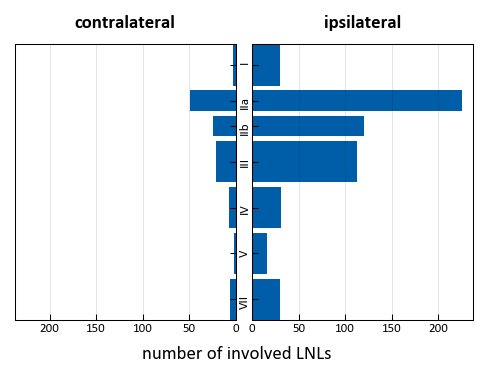

In [13]:
w, sp = 0.9, 0.1
labels  = ["I","IIa","IIb","III","IV","V","VII"]
widths  = [w  , w/2, w/2  , w   , w  , w , w   ]
pos     = [np.sum(widths[0:i])+i*sp for i in range(len(widths))]

fig, ax = plt.subplots(1,2, figsize=set_size(), sharey=True, gridspec_kw={"wspace": 0.075});

for k,side in enumerate(["contra", "ipsi"]):
    heights = []
    for i,column in enumerate(combined_diagnostic_data[side]):
        heights.append(np.sum(combined_diagnostic_data[(side, column)] > 1.))
        
    ax[k].barh(pos, heights, height=widths, align="edge");
    ax[k].grid(axis="x")

x_lim = ax[1].get_xlim();
ax[0].set_xlim(x_lim[::-1]);
ax[0].set_yticks(pos+(np.array(widths)/2.));
ax[0].set_yticklabels(labels, rotation=90.);
ax[0].yaxis.tick_right();
ax[0].set_ylim([np.min(pos), np.max(pos + np.array(widths))][::-1]);
ax[0].set_title("contralateral", fontsize=9);

ax[1].set_xlim(x_lim);
ax[1].set_title("ipsilateral", fontsize=9);

fig.supxlabel("number of involved LNLs", fontweight="normal", fontsize="medium");

if SAVE_PLOTS:
    plt.savefig(PLOT_PATH / "ipsi_vs_contra.svg");

### HPV status & T-stage

Plot the same prevalence of involvement for the four possible combinations of early (T1 & T2) and late (T3 & T4) T-category, as well as HPV+ and HPV-.

In [14]:
hpvT_diagnostic_data = diagnostic_data.copy()
hpvT_diagnostic_data["hpv"] = hpv_status
hpvT_diagnostic_data["t_stage"] = early_late
hpvT_diagnostic_data = hpvT_diagnostic_data[hpvT_diagnostic_data["hpv"].notna()]

In [15]:
early_hpv = hpvT_diagnostic_data.loc[
    hpvT_diagnostic_data["hpv"] & (hpvT_diagnostic_data["t_stage"]=="early")
]
early_nohpv = hpvT_diagnostic_data.loc[
    ~(hpvT_diagnostic_data["hpv"]) & (hpvT_diagnostic_data["t_stage"]=="early")
]
late_hpv = hpvT_diagnostic_data.loc[
    hpvT_diagnostic_data["hpv"] & (hpvT_diagnostic_data["t_stage"]=="late")
]
late_nohpv = hpvT_diagnostic_data.loc[
    ~(hpvT_diagnostic_data["hpv"]) & (hpvT_diagnostic_data["t_stage"]=="late")
]

In [16]:
early_hpv_combined = (
    early_hpv["MRI"].fillna(0.02) 
    + early_hpv["PET"].fillna(0.03) 
    + early_hpv["FNA"].fillna(0.05) 
    + early_hpv["CT"].fillna(0.11)
)
early_nohpv_combined = (
    early_nohpv["MRI"].fillna(0.02) 
    + early_nohpv["PET"].fillna(0.03) 
    + early_nohpv["FNA"].fillna(0.05) 
    + early_nohpv["CT"].fillna(0.11)
)
late_hpv_combined = (
    late_hpv["MRI"].fillna(0.02) 
    + late_hpv["PET"].fillna(0.03) 
    + late_hpv["FNA"].fillna(0.05) 
    + late_hpv["CT"].fillna(0.11)
)
late_nohpv_combined = (
    late_nohpv["MRI"].fillna(0.02) 
    + late_nohpv["PET"].fillna(0.03) 
    + late_nohpv["FNA"].fillna(0.05) 
    + late_nohpv["CT"].fillna(0.11)
)

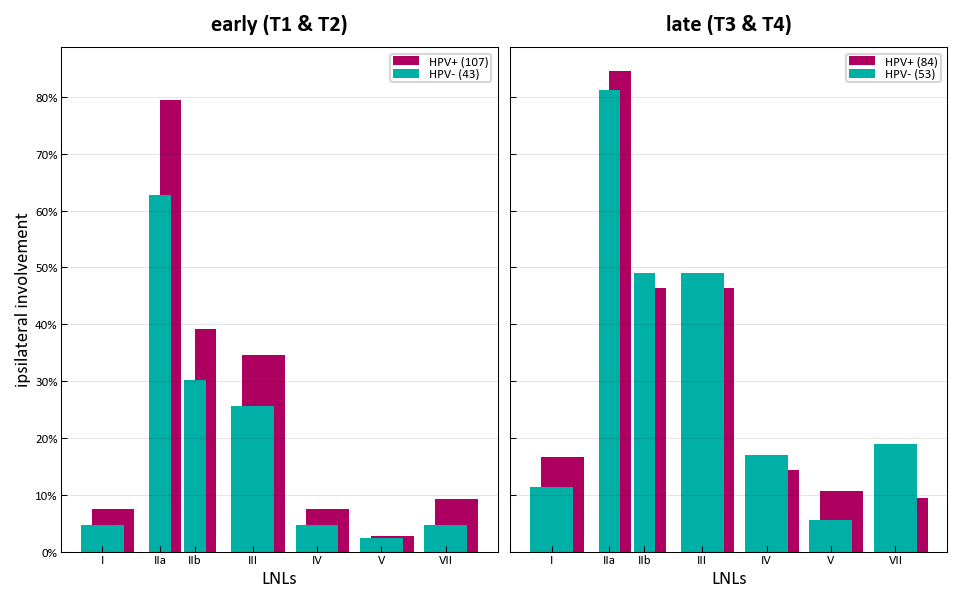

In [17]:
w, sp = 0.8, 0.4
labels  = ["I","IIa","IIb","III","IV","V","VII"]
widths  = np.array([w  , w/2, w/2  , w   , w  , w , w   ])
pos     = np.array([np.sum(widths[0:i])+i*sp for i in range(len(widths))])
pos[1] += 0.075
pos[2] -= 0.075

early_hpv_heights = []
early_nohpv_heights = []
late_hpv_heights = []
late_nohpv_heights = []

for column in labels:
    early_hpv_heights.append(np.sum(early_hpv_combined[("ipsi", column)] > 1.) / len(early_hpv_combined))
    early_nohpv_heights.append(np.sum(early_nohpv_combined[("ipsi", column)] > 1.) / len(early_nohpv_combined))
    late_hpv_heights.append(np.sum(late_hpv_combined[("ipsi", column)] > 1.) / len(late_hpv_combined))
    late_nohpv_heights.append(np.sum(late_nohpv_combined[("ipsi", column)] > 1.) / len(late_nohpv_combined))

bar_kwargs = {
    "align": "edge",
    "width": widths,
}

fig, ax = plt.subplots(1,2, figsize=set_size(width="full"), sharey=True, constrained_layout=True);
ax[0].bar(pos + sp/2., early_hpv_heights, color=usz_red,
          label=f"HPV+ ({len(early_hpv_combined)})",
          **bar_kwargs);
ax[0].bar(pos, early_nohpv_heights, color=usz_green,
          label=f"HPV- ({len(early_nohpv_combined)})",
          **bar_kwargs);
ax[0].set_title("early (T1 & T2)");
ax[0].set_xticks(pos + widths / 2.);
ax[0].set_xticklabels(labels);
ax[0].set_xlabel("LNLs");
ax[0].set_yticks(np.linspace(0., 0.9, 10));
ax[0].set_yticklabels([f"{100*tick:.0f}%" for tick in np.linspace(0., 0.9, 10)]);
ax[0].set_ylabel("ipsilateral involvement");
ax[0].legend();
ax[0].grid(axis="y")

ax[1].bar(pos + sp/2., late_hpv_heights, color=usz_red,
          label=f"HPV+ ({len(late_hpv_combined)})",
          **bar_kwargs);
ax[1].bar(pos, late_nohpv_heights, color=usz_green,
          label=f"HPV- ({len(late_nohpv_combined)})",
          **bar_kwargs);
ax[1].set_title("late (T3 & T4)");
ax[1].set_xticks(pos + widths / 2.);
ax[1].set_xticklabels(labels);
ax[1].set_xlabel("LNLs");
ax[1].legend();
ax[1].grid(axis="y")

if SAVE_PLOTS:
    plt.savefig(PLOT_PATH / "hpv_early_late.svg");

### Midline extension / ipsilateral III & contralateral

A similar plot like above, but this time looking only at the contralateral involvement depending on the primary tumor's extension over the mid-sagittal line or ipsilateral LNL III's involvement respectively.

In [18]:
combined_diagnostic_data = (
    diagnostic_data["MRI"].fillna(0.02) 
    + diagnostic_data["PET"].fillna(0.03) 
    + diagnostic_data["FNA"].fillna(0.05) 
    + diagnostic_data["CT"].fillna(0.11)
)

ext_data = combined_diagnostic_data.loc[mid_ext]
noext_data = combined_diagnostic_data.loc[~mid_ext]

ipsiIII_data = combined_diagnostic_data.loc[ipsi_III]
noipsiIII_data = combined_diagnostic_data.loc[~ipsi_III]

In [19]:
w, sp = 0.8, 0.4
labels  = ["I","IIa","IIb","III","IV","V","VII"]
widths  = np.array([w  , w/2, w/2  , w   , w  , w , w   ])
pos     = np.array([np.sum(widths[0:i])+i*sp for i in range(len(widths))])
pos[1] += 0.075
pos[2] -= 0.075

ext_heights = []
noext_heights = []
ipsiIII_heights = []
noipsiIII_heights = []

for column in labels:
    ipsiIII_heights.append(np.sum(ipsiIII_data[("contra", column)] > 1.) / len(ipsiIII_data))
    noipsiIII_heights.append(np.sum(noipsiIII_data[("contra", column)] > 1.) / len(noipsiIII_data))
    ext_heights.append(np.sum(ext_data[("contra", column)] > 1.) / len(ext_data))
    noext_heights.append(np.sum(noext_data[("contra", column)] > 1.) / len(noext_data))

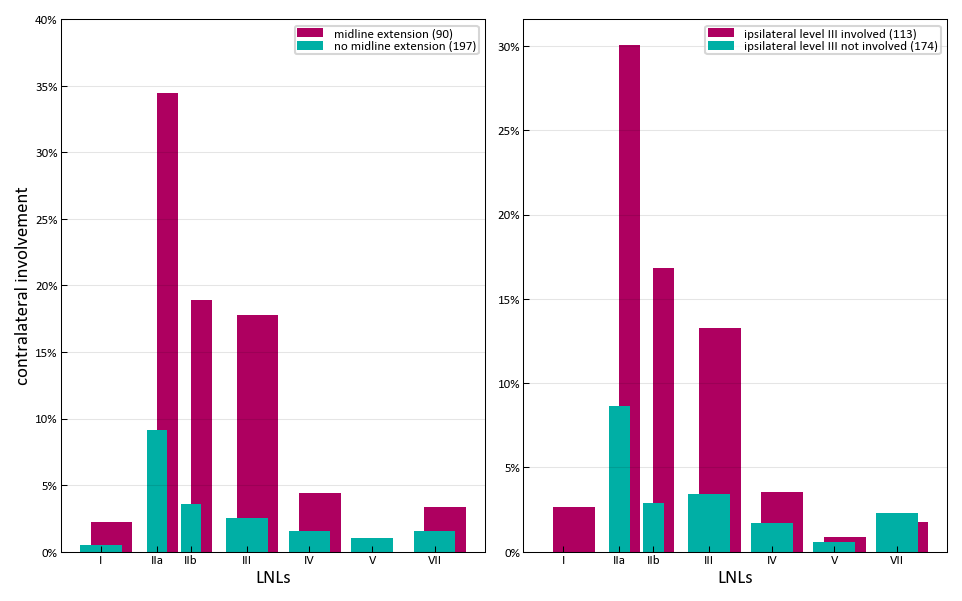

In [20]:
bar_kwargs = {
    "align": "edge",
    "width": widths,
}

fig, ax = plt.subplots(1, 2, figsize=set_size(width="full"), constrained_layout=True);

ax[0].bar(pos + sp/2., ext_heights, color=usz_red,
       label=f"midline extension ({len(ext_data)})",
       **bar_kwargs);
ax[0].bar(pos, noext_heights, color=usz_green,
       label=f"no midline extension ({len(noext_data)})",
       **bar_kwargs);
# ax[0].set_title("midline extension vs lateralized")
ax[0].set_xticks(pos + widths/2.);
ax[0].set_xticklabels(labels);
ax[0].set_xlabel("LNLs");
ax[0].set_yticks(np.linspace(0., 0.4, 9));
ax[0].set_yticklabels([f"{100*tick:.0f}%" for tick in np.linspace(0., 0.4, 9)]);
ax[0].set_ylabel("contralateral involvement");
ax[0].legend();
ax[0].grid(axis="y");

ax[1].bar(pos + sp/2., ipsiIII_heights, color=usz_red,
       label=f"ipsilateral level III involved ({len(ipsiIII_data)})",
       **bar_kwargs);
ax[1].bar(pos, noipsiIII_heights, color=usz_green,
       label=f"ipsilateral level III not involved ({len(noipsiIII_data)})",
       **bar_kwargs);
# ax[1].set_title("midline extension vs lateralized")
ax[1].set_xticks(pos + widths/2.);
ax[1].set_xticklabels(labels);
ax[1].set_xlabel("LNLs");
ax[1].set_yticks(np.linspace(0., 0.3, 7));
ax[1].set_yticklabels([f"{100*tick:.0f}%" for tick in np.linspace(0., 0.3, 7)]);
ax[1].legend();
ax[1].grid(axis="y");

if SAVE_PLOTS:
    plt.savefig(PLOT_PATH / "midline_and_ipsiIII.svg");

### Combinations vs T-stage

Below we plot the frequency of occurence for some combinations of ipsilateral involvement. Note that the labels are added "in post".

In [31]:
early_II_III_IV = 8
late_II_III_IV = 20

early_II_III_noIV = 37
late_II_III_noIV = 43

early_II_noIII_noIV = 71
late_II_noIII_noIV = 51

early_n0 = 27
late_n0 = 18

num_early = (t_stages <= 2).sum()
num_late = (t_stages > 2).sum()

In [32]:
early_involvement = np.array([early_II_III_IV, early_II_III_noIV, 
                              early_II_noIII_noIV, early_n0]) / num_early
late_involvement = np.array([late_II_III_IV, late_II_III_noIV, 
                             late_II_noIII_noIV, late_n0]) / num_late

In [33]:
w, sp = 0.8, 0.4
widths  = np.array([w, w, w, w])
pos     = np.array([np.sum(widths[0:i])+i*sp for i in range(len(widths))])

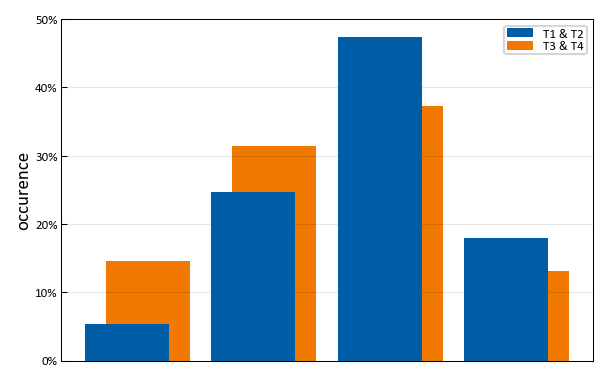

In [35]:
bar_kwargs = {
    "align": "edge",
    "width": widths,
}

fig, ax = plt.subplots(figsize=set_size(), constrained_layout=True);

ax.bar(pos, early_involvement, color=usz_blue,
       label="T1 & T2", zorder=5, **bar_kwargs);
ax.bar(pos + sp/2., late_involvement, color=usz_orange,
       label="T3 & T4", **bar_kwargs);
# ax.set_title("midline extension vs lateralized")
ax.set_xticks([]);
# ax.set_xticklabels(labels);
# ax.set_xlabel("LNLs");
ax.set_yticks(np.linspace(0., 0.5, 6));
ax.set_yticklabels([f"{100*tick:.0f}%" for tick in np.linspace(0., 0.5, 6)]);
ax.set_ylabel("occurence");
ax.legend();
ax.grid(axis="y");

if SAVE_PLOTS:
    plt.savefig(PLOT_PATH / "involvement_combi.svg")

### Depending on subsite

Ipsilateral involvement depending on the primary tumor's subsite (base of tongue vs tonsil).

In [25]:
base_of_tongue = usz_data[("tumor", "1", "subsite")] == "C01.9"
tonsil = usz_data[("tumor", "1", "subsite")].isin(["C09.0", "C09.1", "C09.8", "C09.9"])

In [26]:
combined_diagnostic_data = (
    diagnostic_data["MRI"].fillna(0.02) 
    + diagnostic_data["PET"].fillna(0.03) 
    + diagnostic_data["FNA"].fillna(0.05) 
    + diagnostic_data["CT"].fillna(0.11)
)

bof_data = combined_diagnostic_data.loc[base_of_tongue]
tonsil_data = combined_diagnostic_data.loc[tonsil]

In [27]:
w, sp = 0.8, 0.4
labels  = ["I","IIa","IIb","III","IV","V","VII"]
widths  = np.array([w  , w/2, w/2  , w   , w  , w , w   ])
pos     = np.array([np.sum(widths[0:i])+i*sp for i in range(len(widths))])
pos[1] += 0.075
pos[2] -= 0.075

bof_heights = []
tonsil_heights = []

for column in labels:
    bof_heights.append(np.sum(bof_data[("ipsi", column)] > 1.) / len(bof_data))
    tonsil_heights.append(np.sum(tonsil_data[("ipsi", column)] > 1.) / len(tonsil_data))

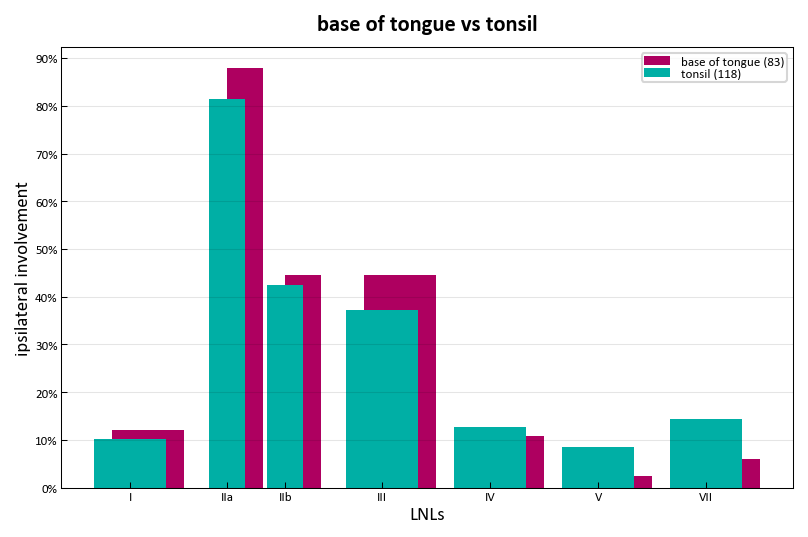

In [28]:
bar_kwargs = {
    "align": "edge",
    "width": widths,
}

fig, ax = plt.subplots(figsize=set_size(width="full"));

ax.bar(pos + sp/2., bof_heights, color=usz_red,
       label=f"base of tongue ({len(bof_data)})",
       **bar_kwargs);
ax.bar(pos, tonsil_heights, color=usz_green,
       label=f"tonsil ({len(tonsil_data)})",
       **bar_kwargs);
ax.set_title("base of tongue vs tonsil")
ax.set_xticks(pos + widths/2.);
ax.set_xticklabels(labels);
ax.set_xlabel("LNLs");
ax.set_yticks(np.linspace(0., 0.9, 10));
ax.set_yticklabels([f"{100*tick:.0f}%" for tick in np.linspace(0., 0.9, 10)]);
ax.set_ylabel("ipsilateral involvement");
ax.legend();
ax.grid(axis="y");

if SAVE_PLOTS:
       plt.savefig(PLOT_PATH / "bot_vs_tonsil.svg");

### Combining everything

Here, we put everything together in one large plot that will cover one DIN A4 page of the paper.

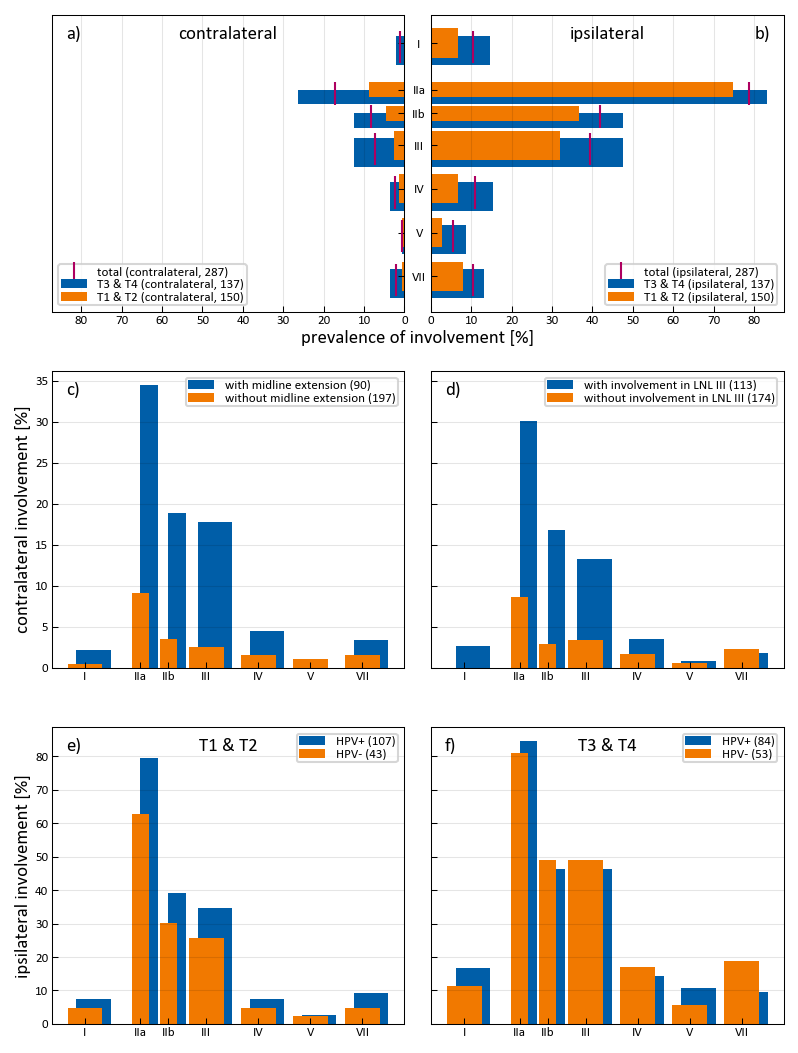

In [29]:
# initialize figure
fig = plt.figure(
    figsize=set_size(width="full", ratio=1./np.sqrt(2)), 
)

# define grid layout
gs = gridspec.GridSpec(ncols=2, nrows=3, figure=fig, wspace=0.075)
ax = {}

# define axes to plot on
ax["prevalence contra"] = fig.add_subplot(gs[0,0])
ax["prevalence ipsi"]   = fig.add_subplot(gs[0,1], sharey=ax["prevalence contra"])
ax["row0"] = fig.add_subplot(gs[0,:], frame_on=False)

ax["contra midext"]  = fig.add_subplot(gs[1,0])
ax["contra ipsiIII"] = fig.add_subplot(gs[1,1], sharey=ax["contra midext"])

ax["HPV early"] = fig.add_subplot(gs[2,0])
ax["HPV late"]  = fig.add_subplot(gs[2,1], sharey=ax["HPV early"])

# barplot settings
w, sp = 0.8, 0.4
labels  = ["I","IIa","IIb","III","IV","V","VII"]
widths  = np.array([w  , w/2, w/2  , w   , w  , w , w   ])
pos     = np.array([np.sum(widths[0:i])+i*sp for i in range(len(widths))])
pos[1] += 0.075
pos[2] -= 0.075
num_total = len(combined_diagnostic_data)
num_early = (t_stages <= 2).sum()
num_late = (t_stages > 2).sum()


# first row, prevalence of involvement ipsi- & contralaterally
prev_ipsi = 100 * (combined_diagnostic_data[("ipsi")] > 1.).sum().values / num_total
prev_ipsi_early = 100 * (combined_diagnostic_data[("ipsi")] > 1.).loc[t_stages <= 2].sum().values / num_early
prev_ipsi_late = 100 * (combined_diagnostic_data[("ipsi")] > 1.).loc[t_stages > 2].sum().values / num_late
ax["prevalence ipsi"].barh(pos, prev_ipsi_late, label=f"T3 & T4 (ipsilateral, {num_late})",
                           height=widths);
ax["prevalence ipsi"].barh(pos - sp/2., prev_ipsi_early, label=f"T1 & T2 (ipsilateral, {num_early})",
                           height=widths);
ax["prevalence ipsi"].scatter(prev_ipsi, pos - sp/4, s=300*widths, color=usz_red, marker="|",
                              label=f"total (ipsilateral, {num_total})", zorder=5);
y_lim = ax["prevalence ipsi"].get_ylim();
ax["prevalence ipsi"].set_ylim(y_lim[::-1]);
ax["prevalence ipsi"].set_yticks(pos - sp/2.);
ax["prevalence ipsi"].set_yticklabels(labels, ha="center", position=(-0.025,0));
ax["prevalence ipsi"].grid(axis='x');
ax["prevalence ipsi"].annotate(
    "ipsilateral", (0.5, 0.92), 
    xycoords="axes fraction", horizontalalignment="center"
);
ax["prevalence ipsi"].legend(loc="lower right");
x_lim = ax["prevalence ipsi"].get_xlim();

prev_contra = 100 * (combined_diagnostic_data[("contra")] > 1.).sum().values / num_total
prev_contra_early = 100 * (combined_diagnostic_data[("contra")] > 1.).loc[t_stages <= 2].sum().values / num_early
prev_contra_late = 100 * (combined_diagnostic_data[("contra")] > 1.).loc[t_stages > 2].sum().values / num_late
ax["prevalence contra"].barh(pos, prev_contra_late, label=f"T3 & T4 (contralateral, {num_late})",
                             height=widths);
ax["prevalence contra"].barh(pos - sp/2., prev_contra_early, label=f"T1 & T2 (contralateral, {num_early})",
                             height=widths);
ax["prevalence contra"].scatter(prev_contra, pos - sp/4, s=300*widths, color=usz_red, marker="|",
                                label=f"total (contralateral, {num_total})", zorder=5);
ax["prevalence contra"].set_ylim(y_lim[::-1]);
ax["prevalence contra"].yaxis.tick_right();
plt.setp(ax["prevalence contra"].get_yticklabels(), visible=False)
ax["prevalence contra"].set_xlim(x_lim[::-1]);
ax["prevalence contra"].grid(axis='x');
ax["prevalence contra"].annotate(
    "contralateral", (0.5, 0.92), 
    xycoords="axes fraction", horizontalalignment="center"
);
ax["prevalence contra"].legend(loc="lower left");

ax["row0"].set_xlabel("prevalence of involvement [%]", labelpad=9);
ax["row0"].set_xticks([]);
ax["row0"].set_yticks([]);

# second row, contralateral involvement depending on midline extension and ipsilateral level III
num_midext = len(combined_diagnostic_data[mid_ext])
num_nomidext = len(combined_diagnostic_data[~mid_ext])
contra_midext = 100 * (combined_diagnostic_data[("contra")] > 1.).loc[mid_ext].sum().values / num_midext
contra_nomidext = 100 * (combined_diagnostic_data[("contra")] > 1.).loc[~mid_ext].sum().values / num_nomidext

ax["contra midext"].bar(pos, contra_midext, label=f"with midline extension ({num_midext})",
                        width=widths);
ax["contra midext"].bar(pos - sp/2., contra_nomidext, label=f"without midline extension ({num_nomidext})",
                        width=widths);
ax["contra midext"].set_xticks(pos - sp/2.);
ax["contra midext"].set_xticklabels(labels);
ax["contra midext"].grid(axis='y');
ax["contra midext"].set_ylabel("contralateral involvement [%]");
ax["contra midext"].legend();

num_ipsiIII = len(combined_diagnostic_data[ipsi_III])
num_noipsiIII = len(combined_diagnostic_data[~ipsi_III])
contra_ipsiIII = 100 * (combined_diagnostic_data[("contra")] > 1.).loc[ipsi_III].sum().values / num_ipsiIII
contra_noipsiIII = 100 * (combined_diagnostic_data[("contra")] > 1.).loc[~ipsi_III].sum().values / num_noipsiIII

ax["contra ipsiIII"].bar(pos, contra_ipsiIII, label=f"with involvement in LNL III ({num_ipsiIII})",
                         width=widths);
ax["contra ipsiIII"].bar(pos - sp/2., contra_noipsiIII, label=f"without involvement in LNL III ({num_noipsiIII})",
                         width=widths);
ax["contra ipsiIII"].set_xticks(pos - sp/2.);
ax["contra ipsiIII"].set_xticklabels(labels);
ax["contra ipsiIII"].grid(axis='y');
ax["contra ipsiIII"].legend();
plt.setp(ax["contra ipsiIII"].get_yticklabels(), visible=False);

# third row, HPV positive vs negative
num_HPVpos_early = len(combined_diagnostic_data.loc[hpv_status & (t_stages <= 2)])
num_HPVneg_early = len(combined_diagnostic_data.loc[~hpv_status & (t_stages <= 2)])
ipsi_HPVpos_early = 100 * (combined_diagnostic_data[("ipsi")] > 1.).loc[hpv_status & (t_stages <= 2)].sum().values / num_HPVpos_early
ipsi_HPVneg_early = 100 * (combined_diagnostic_data[("ipsi")] > 1.).loc[~hpv_status & (t_stages <= 2)].sum().values / num_HPVneg_early

ax["HPV early"].bar(pos, ipsi_HPVpos_early, label=f"HPV+ ({num_HPVpos_early})",
                    width=widths);
ax["HPV early"].bar(pos - sp/2., ipsi_HPVneg_early, label=f"HPV- ({num_HPVneg_early})",
                    width=widths);
ax["HPV early"].set_xticks(pos - sp/2.);
ax["HPV early"].set_xticklabels(labels);
ax["HPV early"].set_ylabel("ipsilateral involvement [%]");
ax["HPV early"].grid(axis='y');
ax["HPV early"].annotate(
    "T1 & T2", (0.5, 0.92), 
    xycoords="axes fraction", horizontalalignment="center"
);
ax["HPV early"].legend();

num_HPVpos_late = len(combined_diagnostic_data.loc[hpv_status & (t_stages > 2)])
num_HPVneg_late = len(combined_diagnostic_data.loc[~hpv_status & (t_stages > 2)])
ipsi_HPVpos_late = 100 * (combined_diagnostic_data[("ipsi")] > 1.).loc[hpv_status & (t_stages > 2)].sum().values / num_HPVpos_late
ipsi_HPVneg_late = 100 * (combined_diagnostic_data[("ipsi")] > 1.).loc[~hpv_status & (t_stages > 2)].sum().values / num_HPVneg_late

ax["HPV late"].bar(pos, ipsi_HPVpos_late, label=f"HPV+ ({num_HPVpos_late})",
                   width=widths);
ax["HPV late"].bar(pos - sp/2., ipsi_HPVneg_late, label=f"HPV- ({num_HPVneg_late})",
                   width=widths);
ax["HPV late"].set_xticks(pos - sp/2.);
ax["HPV late"].set_xticklabels(labels);
ax["HPV late"].grid(axis='y');
plt.setp(ax["HPV late"].get_yticklabels(), visible=False);
ax["HPV late"].annotate(
    "T3 & T4", (0.5, 0.92), 
    xycoords="axes fraction", horizontalalignment="center"
);
ax["HPV late"].legend();

# labelling the six subplots
ax["prevalence contra"].annotate("a)", (0.04, 0.92), xycoords="axes fraction");
ax["prevalence ipsi"].annotate("b)", (0.96, 0.92), xycoords="axes fraction", horizontalalignment="right");
ax["contra midext"].annotate("c)", (0.04, 0.92), xycoords="axes fraction");
ax["contra ipsiIII"].annotate("d)", (0.04, 0.92), xycoords="axes fraction");
ax["HPV early"].annotate("e)", (0.04, 0.92), xycoords="axes fraction");
ax["HPV late"].annotate("f)", (0.04, 0.92), xycoords="axes fraction");

if SAVE_PLOTS:
    plt.savefig(PLOT_PATH / "combined_plots.svg");